# Pokémon Data Analysis

## Imports and Set Up

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the plots to display in the Jupyter notebook.
%matplotlib inline

# Change plotting colors.
plt.style.use('seaborn')

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 14

# Create Pokémon DataFrame.
pokemon = pd.read_csv('pokemon.csv')
pokemon = pokemon.rename(columns={'name':'Name', 'hp':'Health', 'attack':'Attack', 'defense':'Defense', 
                                  'sp_attack': 'Special Attack', 'sp_defense':'Special Defense', 
                                  'speed':'Speed', 'type1':'Type 1', 'type2':'Type 2',}, inplace=False)
pokemon.head(3)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,Attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,Defense,experience_growth,height_m,Health,japanese_name,Name,percentage_male,pokedex_number,Special Attack,Special Defense,Speed,Type 1,Type 2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0


## Part I - Data Analysis and Stuffs

In [279]:
# Return a Pokémon's type(s), stats, weight, and height.
def stats(name):
  stats_subset = pokemon[['Name', 'Type 1', 'Type 2', 'Health', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed']]
  return stats_subset.loc[stats_subset['Name'] == name].squeeze()
  
print(stats('Charizard'))
# print(stats('Pikachu'))
# print(stats('Umbreon'))

Name               Charizard
Type 1                  fire
Type 2                flying
Health                    78
Attack                   104
Defense                   78
Special Attack           159
Special Defense          115
Speed                    100
Name: 5, dtype: object


In [280]:
# Return Japanese name of a Pokémon.
def name_converter(name):
  name_eng = pokemon[['Name', 'japanese_name']]
  name_eng.set_index('Name', inplace=True)
  
  if name in name_eng.index:
    return f'The Japanese name of {name} is ' + name_eng.loc[name, 'japanese_name']
  else:
    return 'That is not a Pokemon name!'

print(name_converter('Charizard'))
print(name_converter('Pikachu'))
print(name_converter('Umbreon'))

The Japanese name of Charizard is Lizardonリザードン
The Japanese name of Pikachu is Pikachuピカチュウ
The Japanese name of Umbreon is Blackyブラッキー


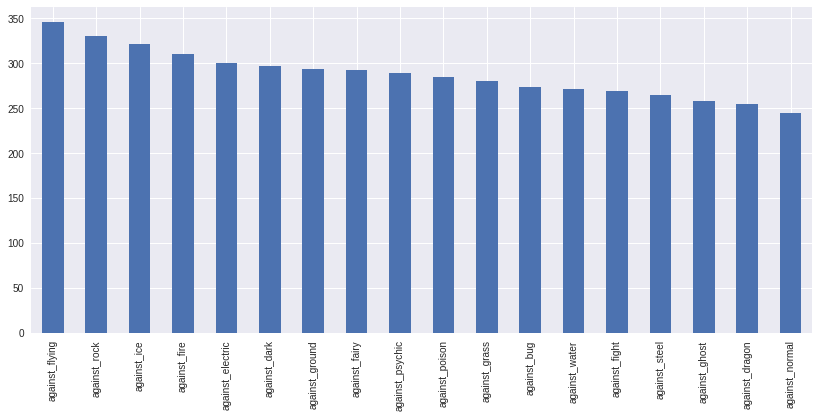

In [0]:
# Most common weaknesses

sorted_stats = pokemon.sort_values('base_total', ascending=False)
against_stats = sorted_stats[['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 
         'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 
         'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water']]

high_stats = against_stats.head(267)
mid_stats = against_stats.iloc[267:534]
low_stats = against_stats.tail(267)

high_stats.sum().sort_values(ascending=False).plot(kind='bar')
mid_stats.sum().sort_values(ascending=False).plot(kind='bar')
low_stats.sum().sort_values(ascending=False).plot(kind='bar')

# https://stackoverflow.com/questions/41787006/making-multiple-pie-charts-out-of-a-pandas-dataframe-one-for-each-row

# TODO: Make this prettier. I.e. into a graph

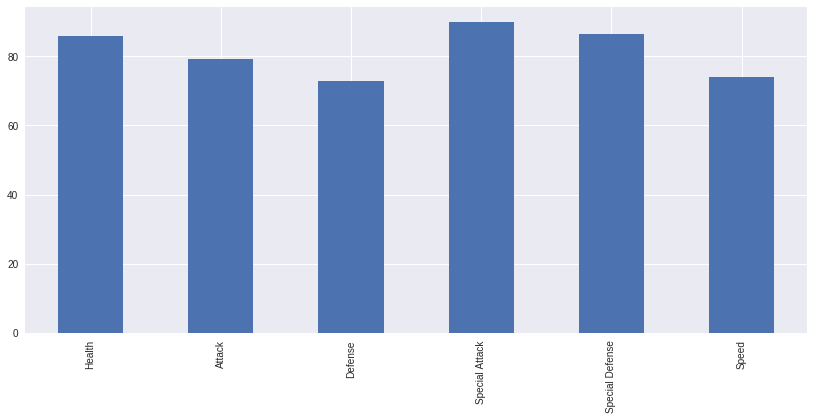

In [290]:
# Return mean for each pokemon stat (e.g. mean speed for all pokemon).
pokemon[['Health', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed']].mean().plot(kind='bar')

# Filter by Pokemon type.
poke_type = 'fire'
pokemon_by_type = pokemon[ (pokemon['Type 1'] == poke_type) | (pokemon['Type 2'] == poke_type) ]
pokemon_by_type[['Health', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed']].mean().plot(kind='bar')

# Only male pokemon
pokemon_male_only = pokemon[pokemon['percentage_male'] == 100]
pokemon_male_only[['Health', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed']].mean().plot(kind='bar')

# Only female pokemon
pokemon_female_only = pokemon[pokemon['percentage_male'] == 0]
pokemon_female_only[['Health', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed']].mean().plot(kind='bar')

## Part II - Is Pokémon Sexist?

In [277]:
# Created subset of male and female oriented Pokemon.
pokemon_male = pokemon[pokemon['percentage_male'] > 50]
pokemon_female = pokemon[pokemon['percentage_male'] < 50]

# Count the total number of Pokemon that lean male vs lean female.
num_pokemon_male = pokemon_male['Name'].count()
num_pokemon_female = pokemon_female['Name'].count()
print(f'Number of Male Leaning Pokemon: {num_pokemon_male}')
print(f'Number of Female Leaning Pokemon: {num_pokemon_female}')

percentage_female = (num_pokemon_female/num_pokemon_male)*100
print(f'{round(percentage_female)}% of Pokemon are female leaning.')

mean_pokemon_male = round(pokemon_male['base_total'].mean())
mean_pokemon_female = round(pokemon_female['base_total'].mean())
# Mean total stats of all male leaning vs female leaning Pokemon.
print(f'Mean Total Stats of Female Pokemon: {mean_pokemon_male}')
print(f'Mean Total Stats of Male Pokemon: {mean_pokemon_female}')

Number of Male Leaning Pokemon: 149
Number of Female Leaning Pokemon: 53
36.0% of Pokemon are female leaning.
Mean Total Stats of Female Pokemon: 438
Mean Total Stats of Male Pokemon: 405


In [255]:
# Mean male percentage of all gendered Pokemon.
capture_rate_male = round(pokemon['percentage_male'].mean())
print(f'Male capture rate: {capture_rate_male}%')
print(f'Female capture rate: {100-capture_rate_male}%')
print(f'You are 5% more likely to catch a male Pokémon than a female Pokémon.')

Male capture rate: 55%
Female capture rate: 45%
You are 5% more likely to catch a male Pokémon than a female Pokémon.


32.0% of the 50 most powerful gendered Pokémon are male.
6.0% of the 50 most powerful gendered Pokémon are female.


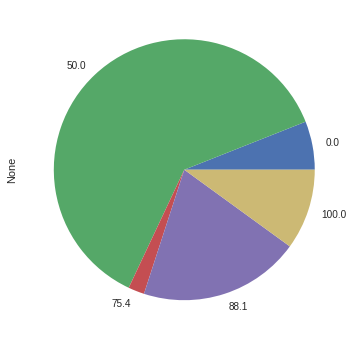

In [278]:
num = 50

# Counts the percentage male of the 50 most powerful pokemon with a gender.
pokemon_with_gender = pokemon.dropna(subset=['percentage_male'])
powerful_gender = pokemon_with_gender[['base_total', 'percentage_male']].sort_values('base_total', ascending=False).head(num).groupby('percentage_male').size()

powerful_gender.plot(kind='pie')

# Calculated percentage male/female of most powerful Pokemon.
percent_powerful_male = (powerful_gender[100.0] + powerful_gender[88.1] + powerful_gender[75.4]) / powerful_gender.sum()
percent_powerful_female = powerful_gender[0.0] / powerful_gender.sum()
print(f'{format(percent_powerful_male*100)}% of the {num} most powerful gendered Pokémon are male.')
print(f'{format(percent_powerful_female*100)}% of the {num} most powerful gendered Pokémon are female.')